1. Loading and Preprocessing

In [62]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import StackingRegressor
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Ridge
from sklearn.feature_selection import RFE

In [3]:
# Load the dataset
data = pd.read_csv('CarPrice_Assignment.csv')

In [4]:
# Check for missing values
data.isnull().sum()
# Handle missing values
data.fillna(data.mode(), inplace=True)
# Encode categorical variables
data = pd.get_dummies(data, drop_first=True)

In [5]:
# Feature scaling for models
scaler = StandardScaler()
scaled_features = scaler.fit_transform(data.drop('price', axis=1))
# Split data into train and test sets
X = scaled_features
y = data['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

2. Model Implementation 

In [38]:
data = data.dropna()  
data = pd.get_dummies(data, drop_first=True) 
X = data.drop('price', axis=1)
y = data['price']

scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

y_pred = lr_model.predict(X_test)

r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print("R-squared:", r2)
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)

R-squared: -8.736195168857855e+24
Mean Squared Error: 6.89670373819079e+32
Mean Absolute Error: 1.3941693316408796e+16


In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [44]:

r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"R-squared: {r2}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")


R-squared: -8.736195168857855e+24
Mean Squared Error (MSE): 6.89670373819079e+32
Mean Absolute Error (MAE): 1.3941693316408796e+16


In [48]:

param_grid = {
    'svr__C': [0.1, 1, 10, 100],
    'svr__kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'svr__gamma': ['scale', 'auto'],
    'svr__epsilon': [0.1, 0.2, 0.5]
}
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best R-squared:", grid_search.best_score_)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best Parameters: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 50}
Best R-squared: 0.8882233071411962


In [50]:

best_model = grid_search.best_estimator_

y_pred_tuned = best_model.predict(X_test)

r2_tuned = r2_score(y_test, y_pred_tuned)
mse_tuned = mean_squared_error(y_test, y_pred_tuned)
mae_tuned = mean_absolute_error(y_test, y_pred_tuned)

print(f"Tuned R-squared: {r2_tuned}")
print(f"Tuned Mean Squared Error (MSE): {mse_tuned}")
print(f"Tuned Mean Absolute Error (MAE): {mae_tuned}")

Tuned R-squared: 0.9477583704254859
Tuned Mean Squared Error (MSE): 4124164.2959177815
Tuned Mean Absolute Error (MAE): 1499.3005609756099


In [52]:
X = data.drop(columns=['price'])  # Replace 'price' with your target variable
y = data['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

gbr = GradientBoostingRegressor(random_state=42)
gbr.fit(X_train, y_train)
y_pred = gbr.predict(X_test)
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"R² Score: {r2}")
print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")

R² Score: 0.9315610059339121
Mean Squared Error: 5402849.37653601
Mean Absolute Error: 1685.616427911343


In [54]:
X = pd.get_dummies(X, drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = DecisionTreeRegressor(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"R²: {r2}")
print(f"MSE: {mse}")
print(f"MAE: {mae}")

R²: 0.8665804146743344
MSE: 10532678.52970461
MAE: 2098.3089512195124


In [56]:
param_grid = {
    'max_depth': [5, 10, 15, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

grid_search = GridSearchCV(DecisionTreeRegressor(random_state=42), param_grid, cv=5, scoring='r2', n_jobs=-1)
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)

best_model = grid_search.best_estimator_
best_model.fit(X_train, y_train)

y_pred_tuned = best_model.predict(X_test)
r2_tuned = r2_score(y_test, y_pred_tuned)
print(f"R² (Tuned): {r2_tuned}")


Best Parameters: {'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 5}
R² (Tuned): 0.8966339141732562


In [7]:
# Initialize the models
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "Gradient Boosting": GradientBoostingRegressor(),
    "SVR": SVR()
}

# Train and evaluate models
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Calculate performance metrics
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    
    results[name] = {"R2": r2, "MSE": mse, "MAE": mae}

# Display results
results_df = pd.DataFrame(results).T
print(results_df)

                             R2           MSE           MAE
Linear Regression -8.736195e+24  6.896704e+32  1.394169e+16
Decision Tree      8.589395e-01  1.113588e+07  2.087211e+03
Random Forest      9.534262e-01  3.676726e+06  1.388281e+03
Gradient Boosting  9.335339e-01  5.247099e+06  1.632273e+03
SVR               -1.020678e-01  8.700167e+07  5.707022e+03


3. Model Evaluation

In [9]:
for name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    
    # Predict on the test set
    y_pred = model.predict(X_test)

In [10]:
results_df = pd.DataFrame(results).T
print(results_df)

                             R2           MSE           MAE
Linear Regression -8.736195e+24  6.896704e+32  1.394169e+16
Decision Tree      8.589395e-01  1.113588e+07  2.087211e+03
Random Forest      9.534262e-01  3.676726e+06  1.388281e+03
Gradient Boosting  9.335339e-01  5.247099e+06  1.632273e+03
SVR               -1.020678e-01  8.700167e+07  5.707022e+03


In [11]:
# parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
# GridSearchCV
grid_search = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=5, scoring='r2', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best parameters and score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

Best Parameters: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 300}
Best Score: 0.885318187572721


In [12]:
estimators = [
    ('lr', LinearRegression()),
    ('rf', RandomForestRegressor(random_state=42)),
    ('gbr', GradientBoostingRegressor(random_state=42))
]
stack_model = StackingRegressor(estimators=estimators, final_estimator=RandomForestRegressor())
stack_model.fit(X_train, y_train)
y_pred = stack_model.predict(X_test)

In [13]:
scores = cross_val_score(model, X, y, cv=5, scoring='r2')
print("Cross-Validation R2 Scores:", scores)
print("Average R2 Score:", scores.mean())

Cross-Validation R2 Scores: [-0.12356917 -0.32140674 -0.06235181 -0.01934956 -0.50722123]
Average R2 Score: -0.20677970190202774


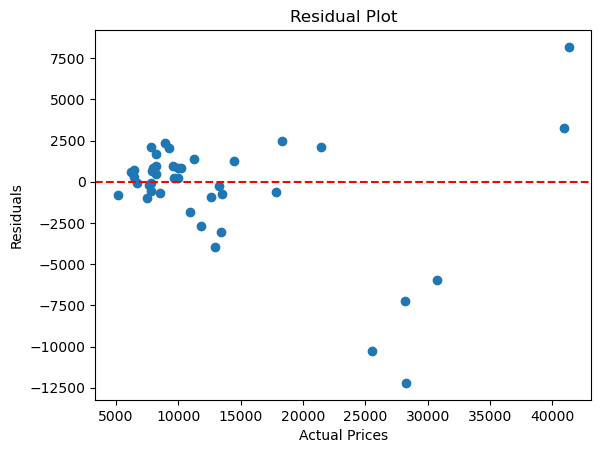

In [15]:
residuals = y_test - y_pred
plt.scatter(y_test, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Actual Prices")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()

4. Feature Importance Analysis

In [17]:
# Feature using Random Forest Regressor
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)
#feature importance
importance = rf_model.feature_importances_

# DataFrame
feature_importance_df = pd.DataFrame({
    "Feature": data.drop('price', axis=1).columns,
    "Importance": importance
}).sort_values(by="Importance", ascending=False)

print(feature_importance_df)


                              Feature  Importance
7                          enginesize    0.582417
6                          curbweight    0.233147
14                         highwaympg    0.073615
11                         horsepower    0.021162
4                            carwidth    0.016948
..                                ...         ...
131  CarName_toyota corolla 1600 (sw)    0.000000
125            CarName_subaru tribeca    0.000000
124             CarName_subaru trezia    0.000000
123                 CarName_subaru r2    0.000000
83          CarName_mitsubishi pajero    0.000000

[190 rows x 2 columns]


5. Hyperparameter Tuning 

In [19]:
#parameter grid Random Forest
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(RandomForestRegressor(), param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best parameters: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 100}
Best score: 0.8858695795231553


In [64]:
print(results_df)

                             R2           MSE           MAE
Linear Regression -8.736195e+24  6.896704e+32  1.394169e+16
Decision Tree      8.589395e-01  1.113588e+07  2.087211e+03
Random Forest      9.534262e-01  3.676726e+06  1.388281e+03
Gradient Boosting  9.335339e-01  5.247099e+06  1.632273e+03
SVR               -1.020678e-01  8.700167e+07  5.707022e+03
